# Uber Drivers EDA

#### import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### reading dataset

In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')

#### displaying first 5 rows of dataset

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### columns in dataset

In [5]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

#### No. of rows and columns

In [6]:
df.shape

(1156, 7)

#### checking null values

In [7]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

#### find duplicate rows

In [8]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


#### there is one duplicated row, we are gonna remove this duplicate row

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [11]:
df.shape

(1155, 7)

#### There we have 4 rows having starting and end-time exactly equal i.e. zero trip time, while having non-zero miles (distance) - which cannot be possible.

In [12]:
df.drop(df.index[[751, 761, 798, 807]], inplace=True)

In [13]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [14]:
df.shape

(1151, 7)

#### Renaming column names 

In [15]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

#### Converting START_DATE and END_DATE into date time

In [16]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1150 non-null   datetime64[ns]
 1   END_DATE    1150 non-null   datetime64[ns]
 2   CATEGORY    1150 non-null   object        
 3   START       1150 non-null   object        
 4   STOP        1150 non-null   object        
 5   MILES       1151 non-null   float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.9+ KB


#### Count Plot

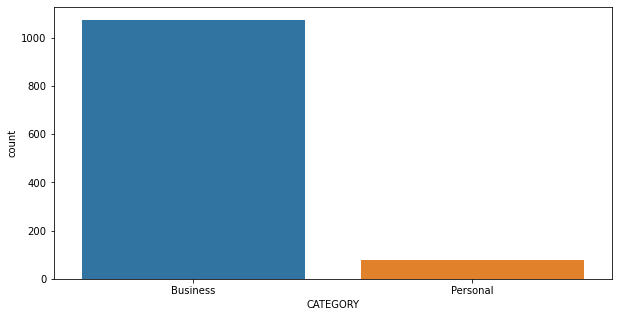

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(df['CATEGORY']);

In [19]:
start_labels = df.START.value_counts().nlargest(10)
start_labels

Cary                201
Unknown Location    146
Morrisville          85
Whitebridge          68
Islamabad            56
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

#### Bar Plot

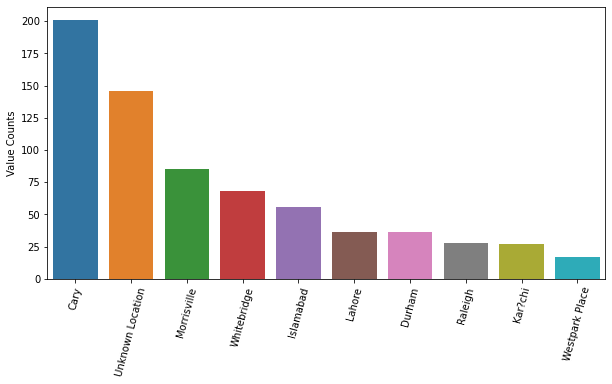

In [20]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(start_labels.index, start_labels);
plt.ylabel('Value Counts');

In [21]:
stop_labels = df.STOP.value_counts().nlargest(10)
stop_labels

Cary                202
Unknown Location    146
Morrisville          84
Whitebridge          65
Islamabad            57
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

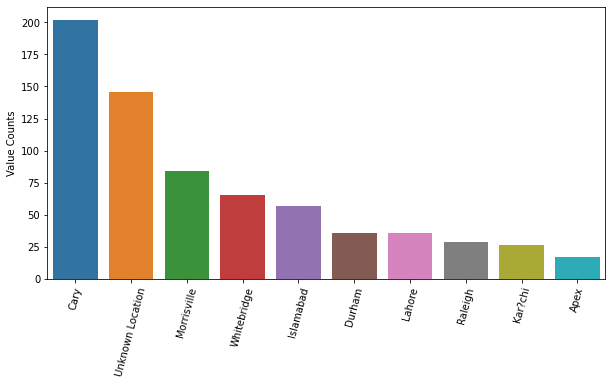

In [22]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(stop_labels.index, stop_labels);
plt.ylabel('Value Counts');

#### Extracting months from column START_DATE

In [23]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
df['MONTH']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
1151    12.0
1152    12.0
1153    12.0
1154    12.0
1155     NaN
Name: MONTH, Length: 1151, dtype: float64

In [24]:
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec' }
month_label

{1.0: 'Jan',
 2.0: 'Feb',
 3.0: 'Mar',
 4.0: 'April',
 5.0: 'May',
 6.0: 'June',
 7.0: 'July',
 8.0: 'Aug',
 9.0: 'Sep',
 10.0: 'Oct',
 11.0: 'Nov',
 12.0: 'Dec'}

In [25]:
df["MONTH"] = df.MONTH.map(month_label)
df["MONTH"]

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
1151    Dec
1152    Dec
1153    Dec
1154    Dec
1155    NaN
Name: MONTH, Length: 1151, dtype: object

In [26]:
df.MONTH.unique()

array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', nan], dtype=object)

In [27]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan


#### Bar Plot

In [28]:
month_count = df.MONTH.value_counts()
month_count

Dec      146
Aug      133
Nov      122
Feb      115
Mar      113
July     112
June     107
Oct      104
Jan       61
April     54
May       49
Sep       34
Name: MONTH, dtype: int64

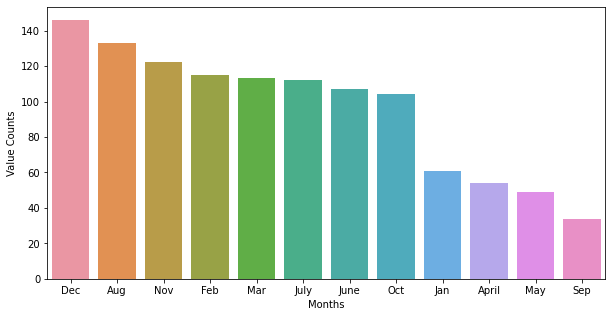

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(month_count.index, month_count);
plt.xlabel('Months')
plt.ylabel('Value Counts');

#### creating a dictonary that contains info about miles column

In [30]:
miles_dic = {}

for i in df.MILES:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
            
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
            
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
            miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
            
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
            
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)

In [31]:
len_miles = []
for key in miles_dic:
    len_miles.append((key, len(miles_dic[key])))

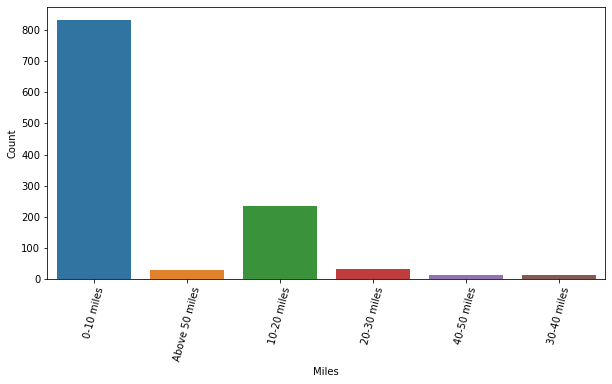

In [32]:
a, b = [], []
for i, j in len_miles:
    a.append(i)
    b.append(j)

plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(a, b)
plt.xlabel('Miles')
plt.ylabel('Count');

#### Now we want to know how many trips were made on Day time and how many on Night time 

In [33]:
t = pd.to_datetime(['18:00:00']).time
t

array([datetime.time(18, 0)], dtype=object)

In [40]:
df['DAY'] = df.START_DATE.dt.weekday
df['DAY']

0       4.0
1       5.0
2       5.0
3       1.0
4       2.0
       ... 
1151    5.0
1152    5.0
1153    5.0
1154    5.0
1155    NaN
Name: DAY, Length: 1151, dtype: float64

In [41]:
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fir', 5: 'Sat', 6: 'Sun'
}
day_label

{0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fir', 5: 'Sat', 6: 'Sun'}

In [42]:
df['DAY'] = df['DAY'].map(day_label)
df['DAY']

0        Fir
1        Sat
2        Sat
3       Tues
4        Wed
        ... 
1151     Sat
1152     Sat
1153     Sat
1154     Sat
1155     NaN
Name: DAY, Length: 1151, dtype: object

In [43]:
day_label = df.DAY.value_counts()
day_label

Fir     206
Tues    175
Mon     174
Thus    153
Sat     148
Wed     147
Sun     147
Name: DAY, dtype: int64

#### bar plot of days

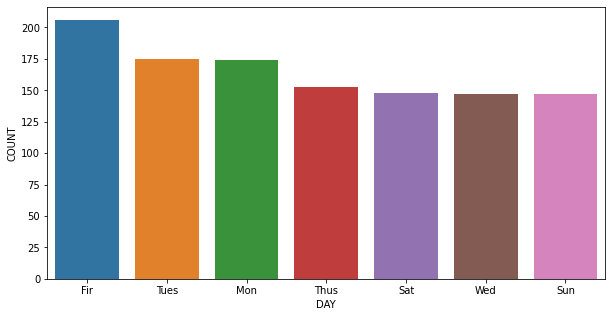

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(day_label.index, day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT');

#### count plot of day

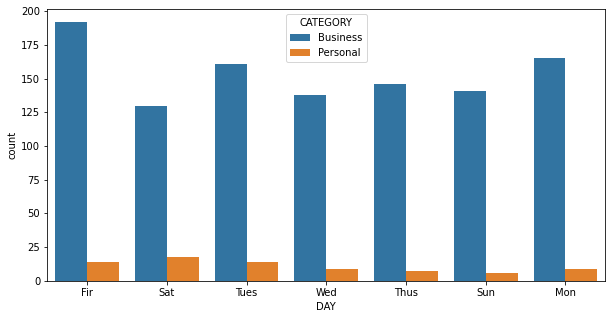

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(hue='CATEGORY', x='DAY', data=df);